# Create another forecasting model for the number of sales (i.e., people buying tickets). 
<br> Fahim Faisal

# Model

In [1]:
# load sales ensemble model
from EnsembleModelSales import EnsembleModelSales
# load core sales model
from SalesModel import SalesModel

# Load data

In [2]:

import pandas as pd
import seaborn as sns


import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
def load_data(file):
    # generic data processing function
    df = pd.read_csv(file,
                dtype={'_id':int, 'Redemption Count': int, 'Sales Count':int},
                parse_dates=['Timestamp'])
    df.sort_values('Timestamp', inplace=True)
    
  
    
    # convert to time-aware
    df.set_index('Timestamp', inplace=True)
    df_daily = df.resample('d').sum()
    # engineer some time features 
    df_daily['monthly'] = df_daily.reset_index().Timestamp.dt.month.values
    df_daily['quarter'] = df_daily.reset_index().Timestamp.dt.quarter.values
    
    #added later
    df_daily['year']=df_daily.index.year
    #df_daily['hour']=df_daily.index.hour
    #print(df_daily)
    
    # additional features 
    df_daily['dayofweek'] = df_daily.index.dayofweek
    df_daily['dayofyear'] = df_daily.index.dayofyear
    df_daily['dayofmonth'] = df_daily.index.day

    df_daily['weekofyear'] = df_daily.index.isocalendar().week.astype(int)


    # Season from month
    #df_daily['season'] = df_daily.index.month.map(month_to_season)
    
    
    #df_daily['season'] = LabelEncoder().fit_transform(df_daily['season'])
    # Lag features

 
        
    return df_daily

In [4]:
df = load_data('./data/Toronto Island Ferry Ticket Counts.csv')

In [5]:
df.head()

,_id,Redemption Count,Sales Count,monthly,quarter,year,dayofweek,dayofyear,dayofmonth,weekofyear
Timestamp,,,,,,,,,,
2015-05-01,985646,1,4,5,2,2015,4,121,1,18
2015-05-02,0,0,0,5,2,2015,5,122,2,18
2015-05-03,0,0,0,5,2,2015,6,123,3,18
2015-05-04,4681600,12,75,5,2,2015,0,124,4,19
2015-05-05,11332905,537,549,5,2,2015,1,125,5,19


In [6]:
df.columns

Index(['_id', 'Redemption Count', 'Sales Count', 'monthly', 'quarter', 'year',
       'dayofweek', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

## Sales Count by dayofmonth

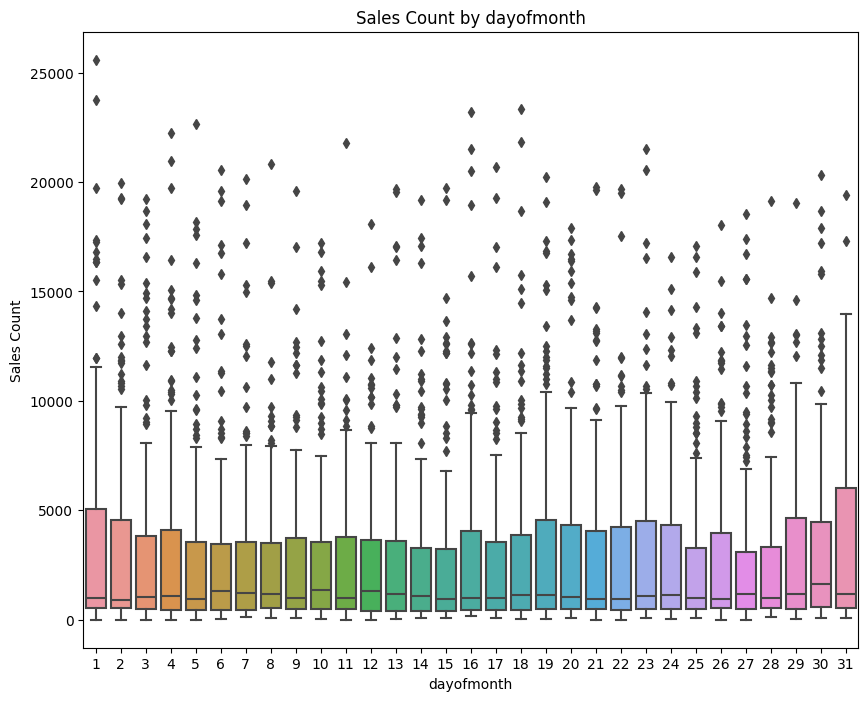

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofmonth', y='Sales Count')
ax.set_title('Sales Count by dayofmonth')
plt.show()

## Sales Count by monthly

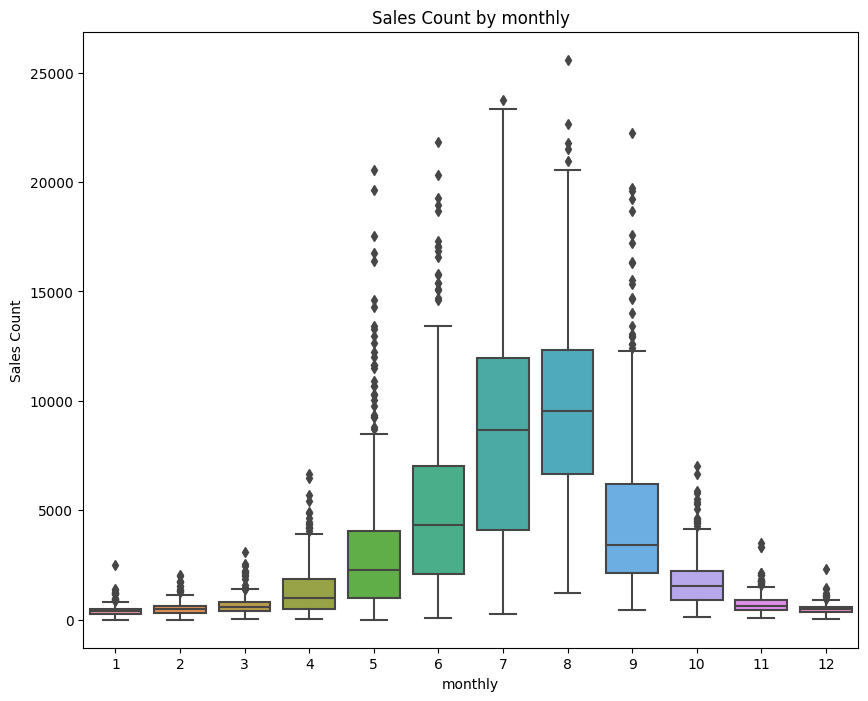

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='monthly', y='Sales Count')
ax.set_title('Sales Count by monthly')
plt.show()

## Sales Count by quarter

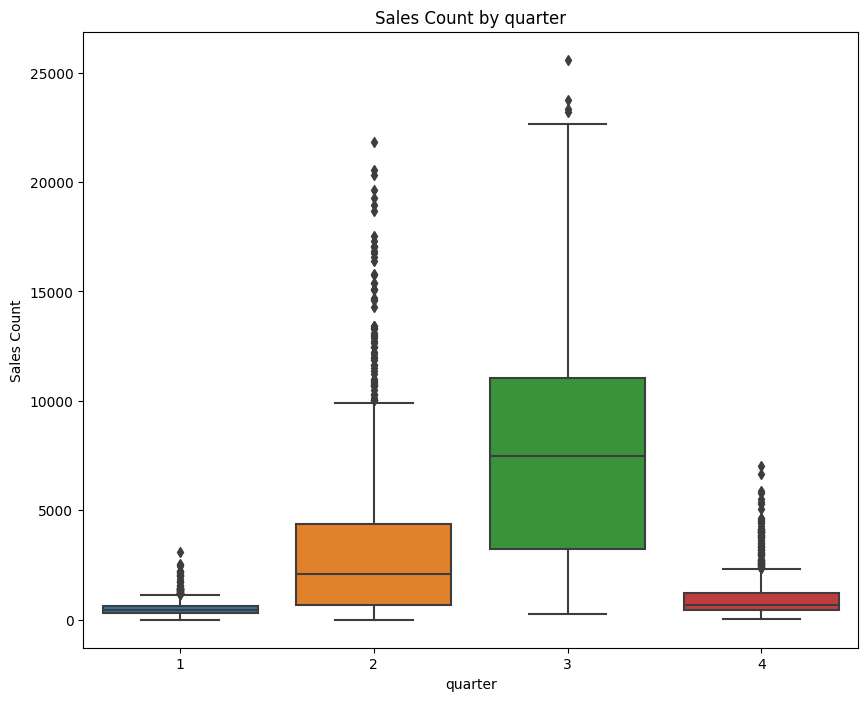

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Sales Count')
ax.set_title('Sales Count by quarter')
plt.show()

##  Sales Count by Redemption Count

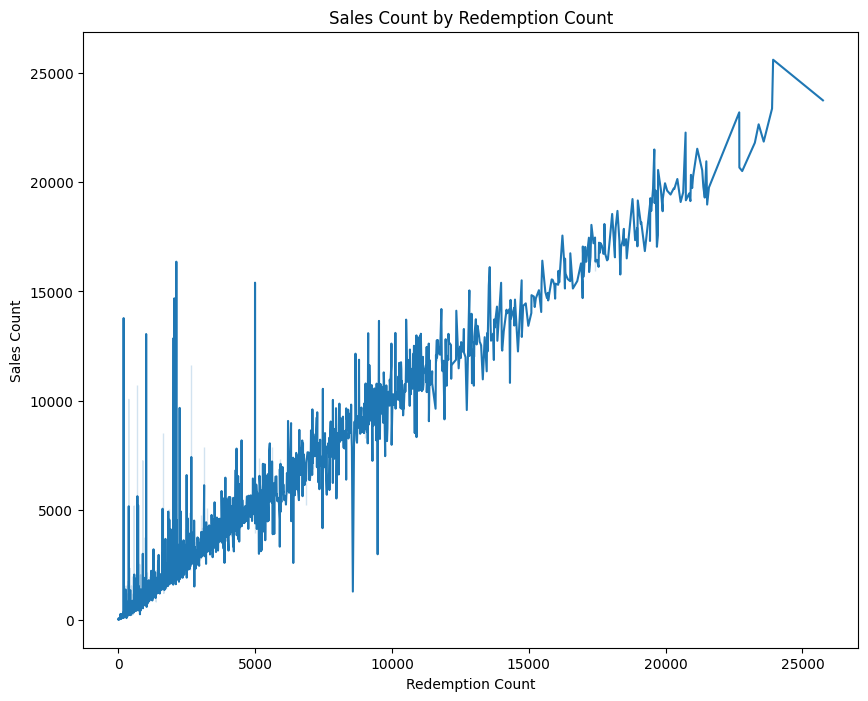

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x='Redemption Count', y='Sales Count')
ax.set_title('Sales Count by Redemption Count')
plt.show()

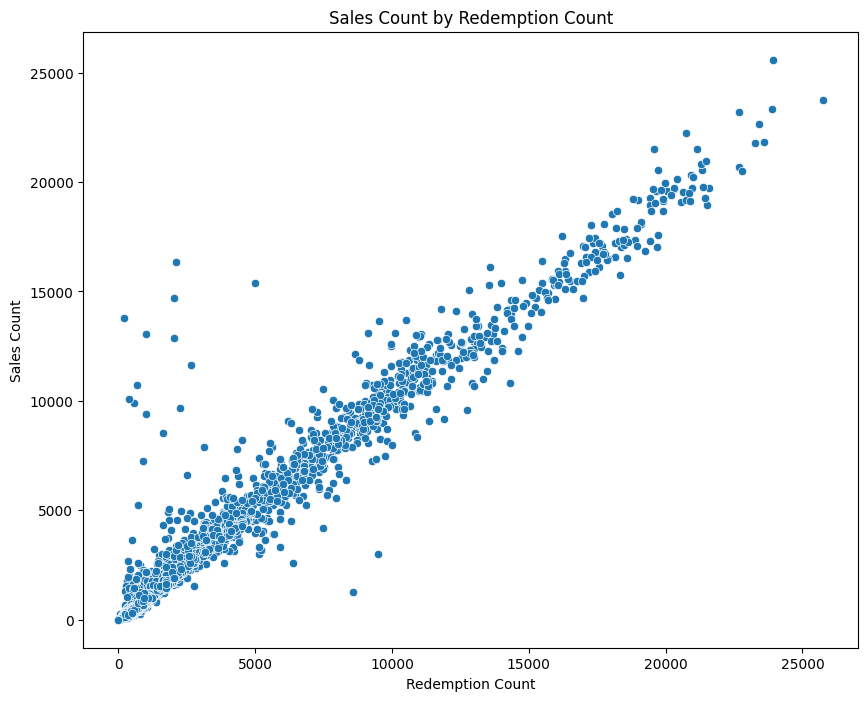

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df, x='Redemption Count', y='Sales Count')

ax.set_title('Sales Count by Redemption Count')
plt.show()

## Sales Count  by dayofweek

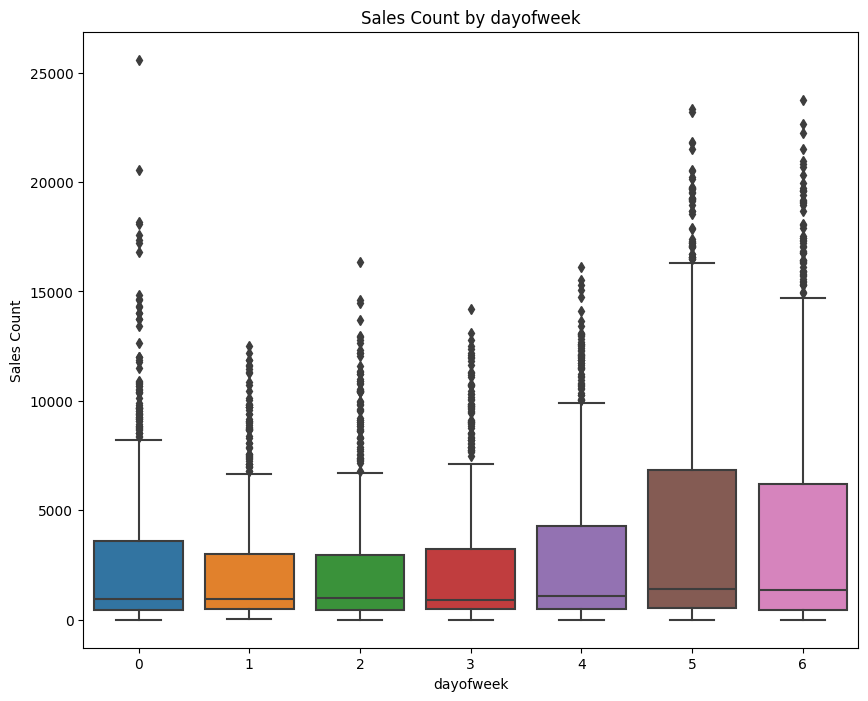

In [9]:

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='Sales Count')
ax.set_title('Sales Count by dayofweek')
plt.show()

## Sales Count by dayofyear

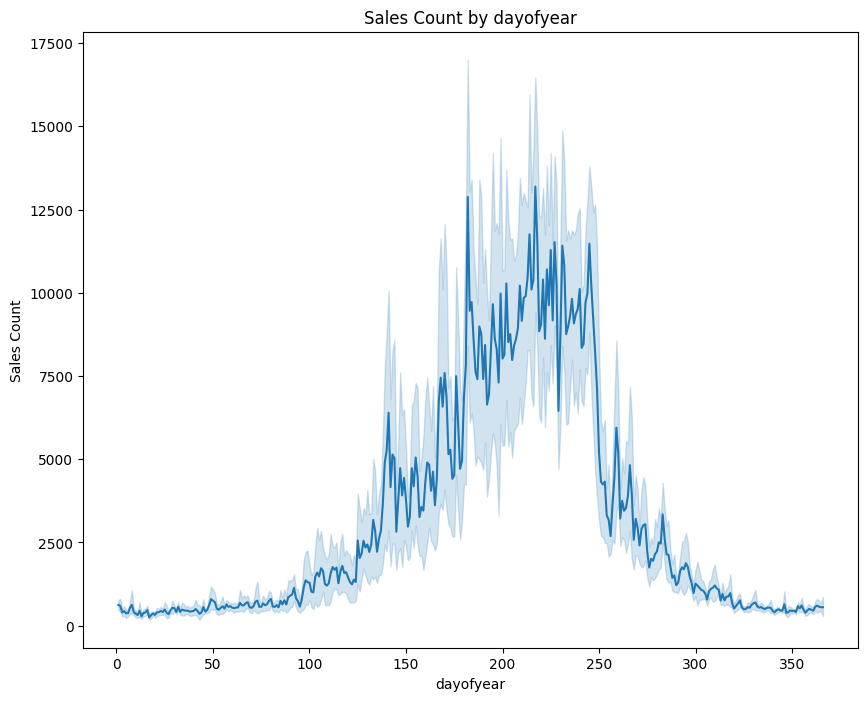

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=df, x='dayofyear', y='Sales Count')
ax.set_title('Sales Count by dayofyear')
plt.show()

## ACF, PACF plot for sales
The PACF plot shows the direct correlation at each lag, helping identify the order of autoregressive terms. <br>
The ACF plot reveals a decaying pattern, indicating a potential seasonality in the data. 

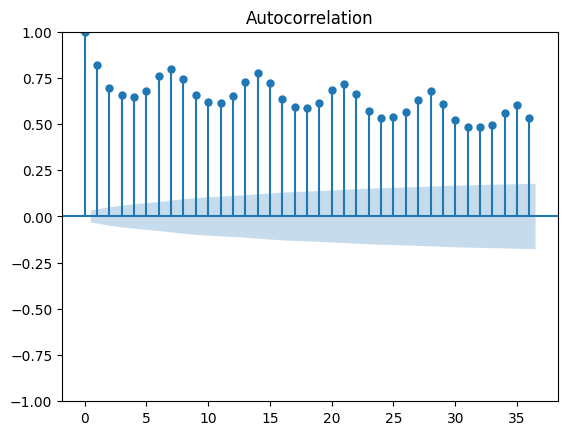

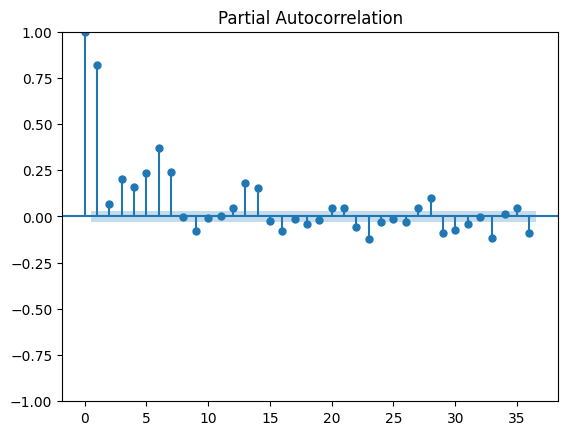

In [14]:


acf_original = plot_acf(df['Sales Count'])

pacf_original = plot_pacf(df['Sales Count'])

## We assume that the series is stationary form the test

In [13]:

adf_test = adfuller(df['Sales Count'])
print(f'p-value: {adf_test[1]}')

p-value: 8.579976411649306e-05


2015 2
2016 0
2017 0
2018 1
2019 0
2020 0
2021 2
2022 0
2023 0
2024 0
2025 1


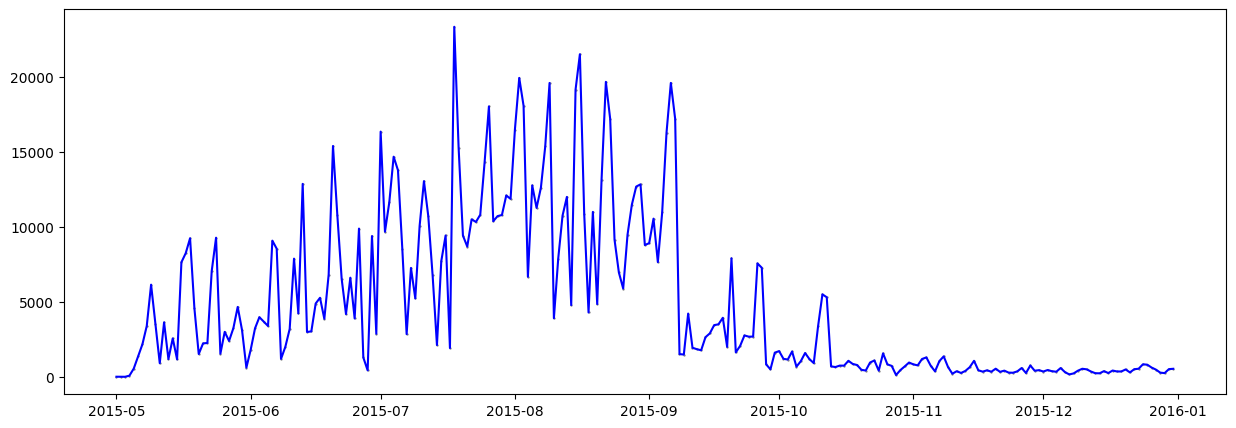

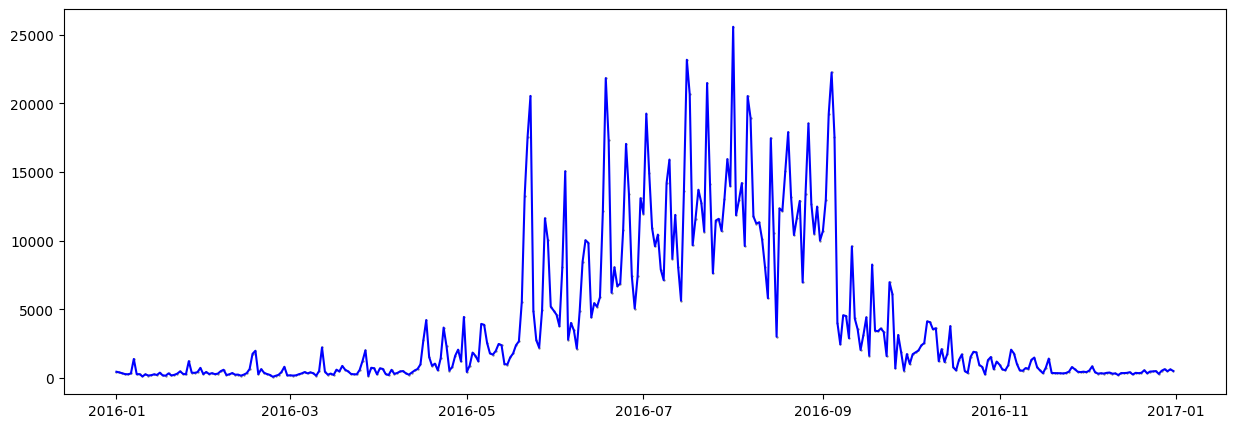

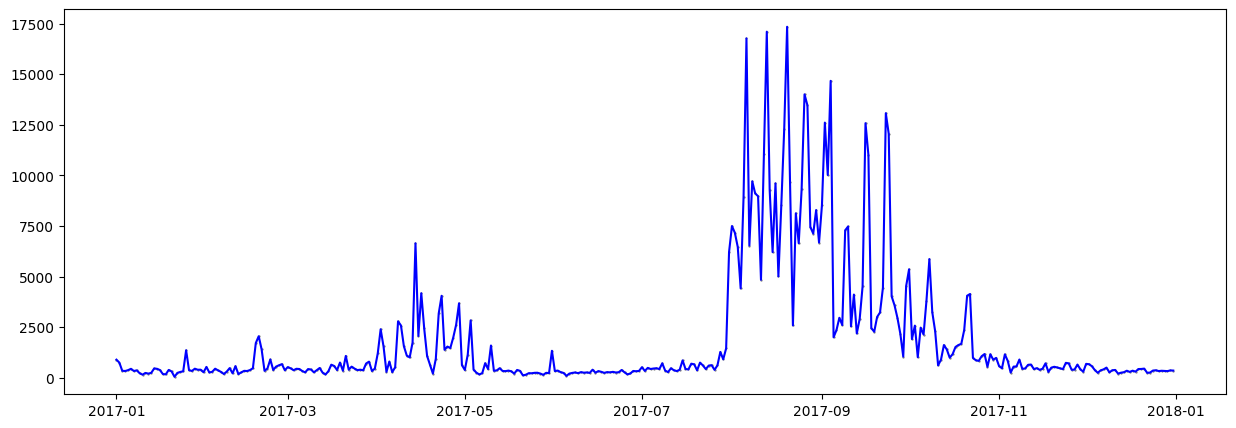

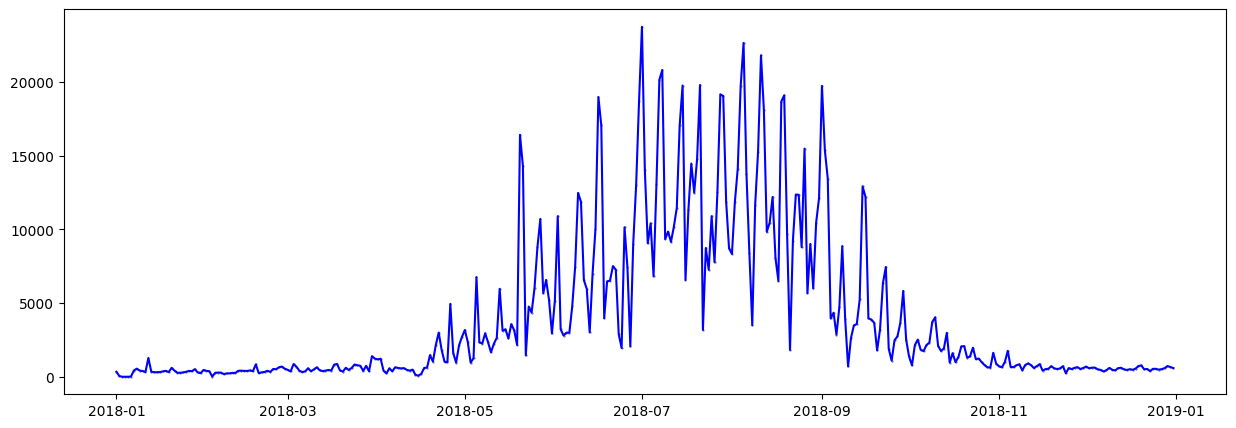

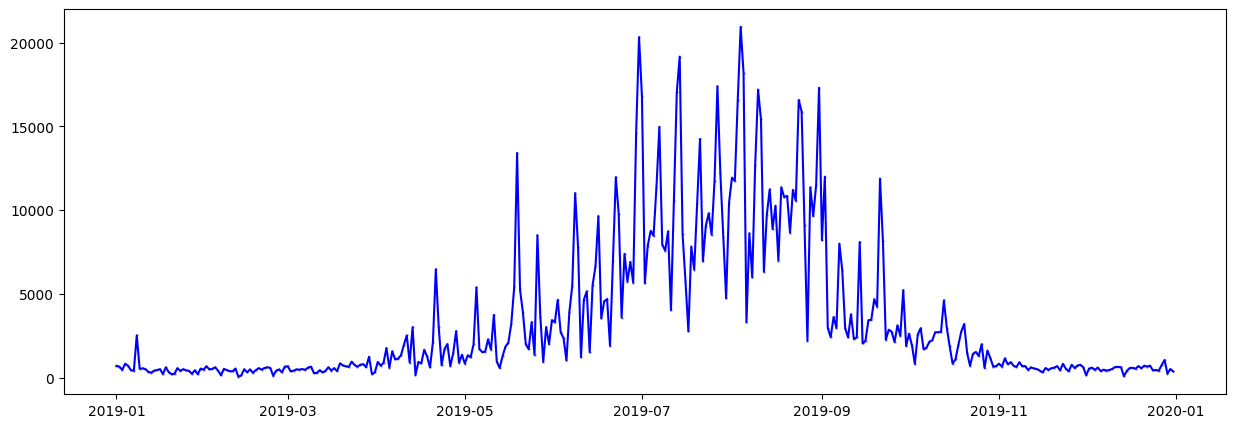

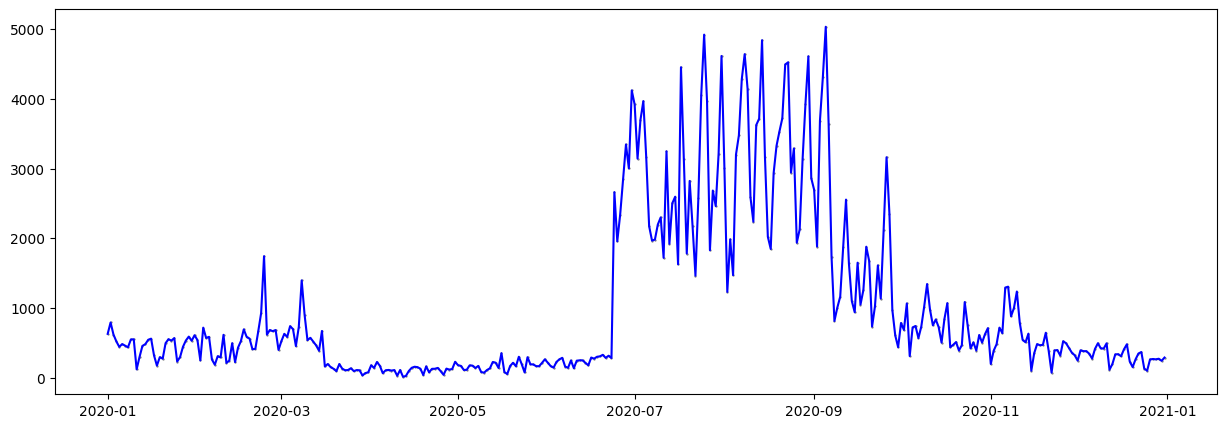

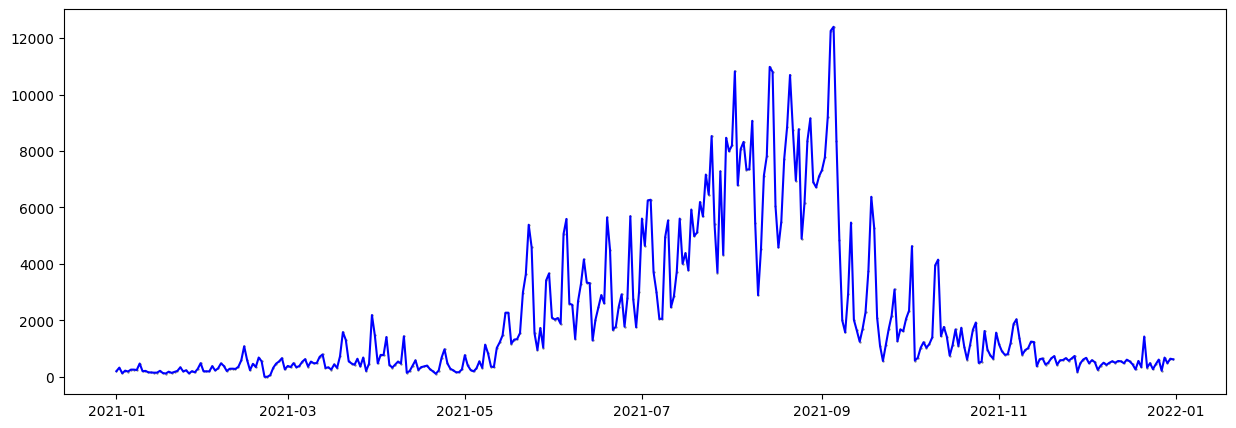

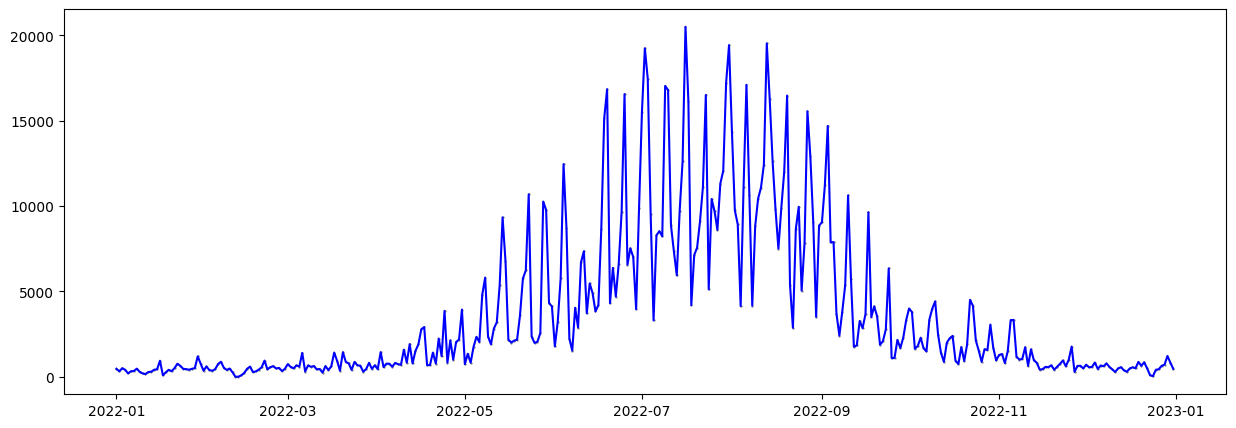

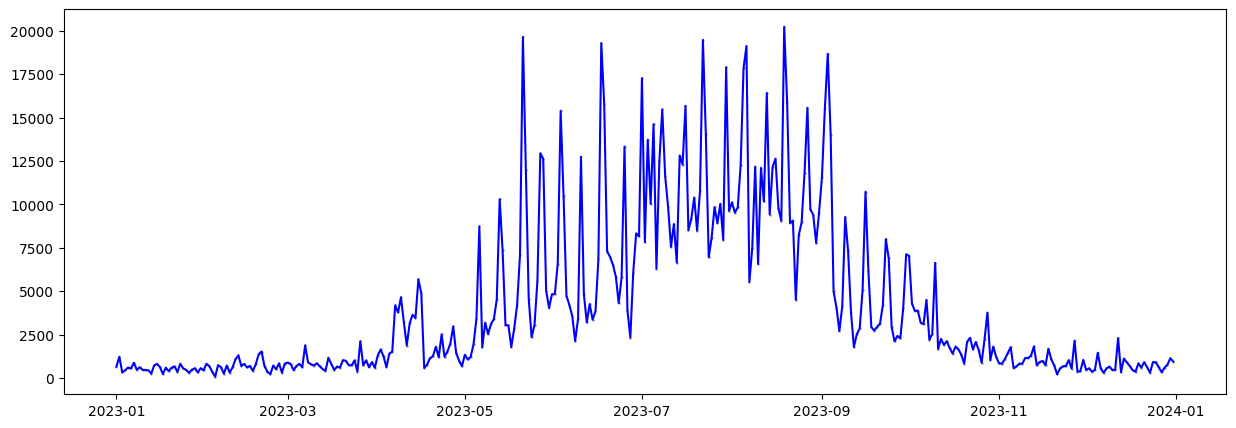

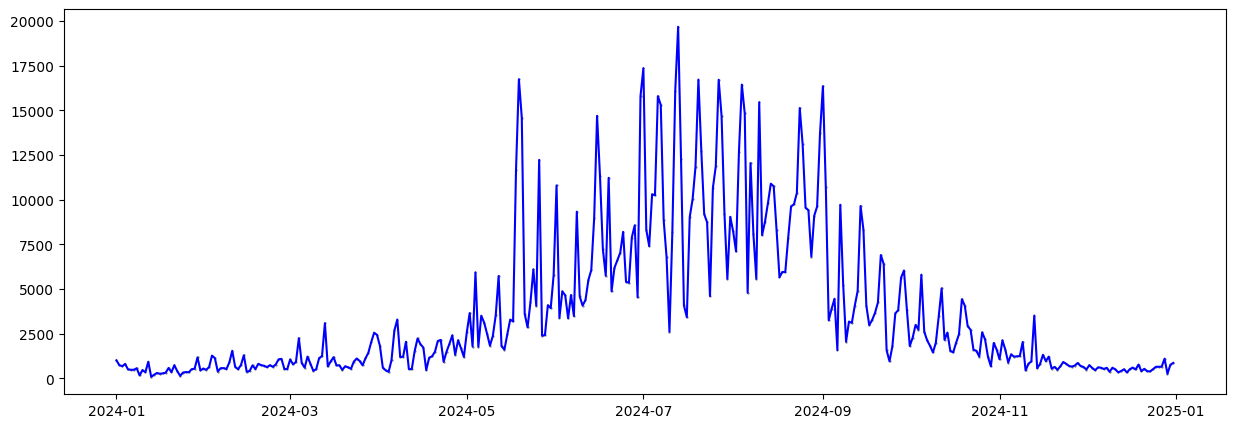

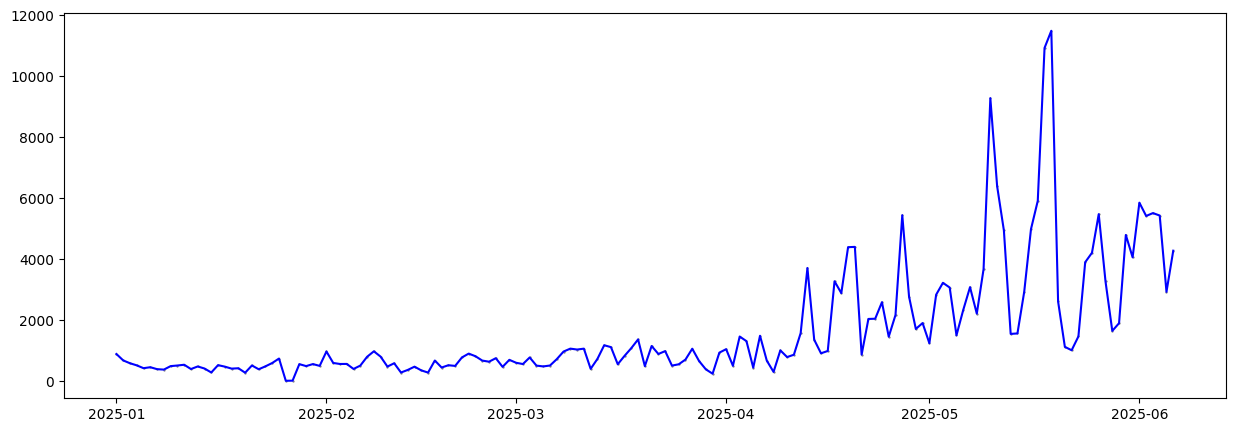

In [11]:
years=list(df['year'].unique())
for year in years:
    sub_df=df[df['year']==year]
    sub_df['year'].describe()
    print(year,sub_df[sub_df['Sales Count']==0].shape[0])
    fig, ax = plt.subplots(figsize=(15, 5))
    
    ax.scatter(sub_df.index, sub_df['Sales Count'], s=0.4, color='grey',
            label='Observed')
    ax.plot(sub_df.index, sub_df['Sales Count'].values, label='Scatters', color='blue')

### common seasonal spike in summer (7,8,9 months)

In [12]:
df.columns

Index(['_id', 'Redemption Count', 'Sales Count', 'monthly', 'quarter', 'year',
       'dayofweek', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [13]:
df.describe()

,_id,Redemption Count,Sales Count,monthly,quarter,year,dayofweek,dayofyear,dayofmonth,weekofyear
count,3.690000e+03,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000,3690.000000
mean,8.227590e+06,3126.078320,3176.848509,6.508672,2.503252,2019.880759,3.000271,182.707588,15.713821,26.543360
std,4.674464e+06,4337.610739,4338.948797,3.434877,1.112835,2.941995,2.000068,105.034946,8.810215,15.009309
min,0.000000e+00,0.000000,0.000000,1.000000,1.000000,2015.000000,0.000000,1.000000,1.000000,1.000000
25%,4.276312e+06,557.250000,470.250000,4.000000,2.000000,2017.000000,1.000000,93.000000,8.000000,14.000000
50%,8.470324e+06,1056.500000,1064.000000,6.000000,2.000000,2020.000000,3.000000,181.000000,16.000000,26.000000
75%,1.170664e+07,3647.750000,3965.500000,9.000000,3.000000,2022.000000,5.000000,273.750000,23.000000,40.000000
max,2.032078e+07,25748.000000,25585.000000,12.000000,4.000000,2025.000000,6.000000,366.000000,31.000000,53.000000


## completeness

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3690 entries, 2015-05-01 to 2025-06-06
Freq: D
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   _id               3690 non-null   int32
 1   Redemption Count  3690 non-null   int32
 2   Sales Count       3690 non-null   int32
 3   monthly           3690 non-null   int64
 4   quarter           3690 non-null   int64
 5   year              3690 non-null   int64
 6   dayofweek         3690 non-null   int64
 7   dayofyear         3690 non-null   int64
 8   dayofmonth        3690 non-null   int64
 9   weekofyear        3690 non-null   int32
dtypes: int32(4), int64(6)
memory usage: 259.5 KB


## id check

In [14]:
df.groupby(['_id']).size()

_id
0           6
1225        1
6401        1
13080       1
19480       1
           ..
19646995    1
19879745    1
19891765    1
19954125    1
20320780    1
Length: 3684, dtype: int64

## min / max year

In [15]:
print(min(df.index))
print(max(df.index))

2015-05-01 00:00:00
2025-06-06 00:00:00


## inspect trends

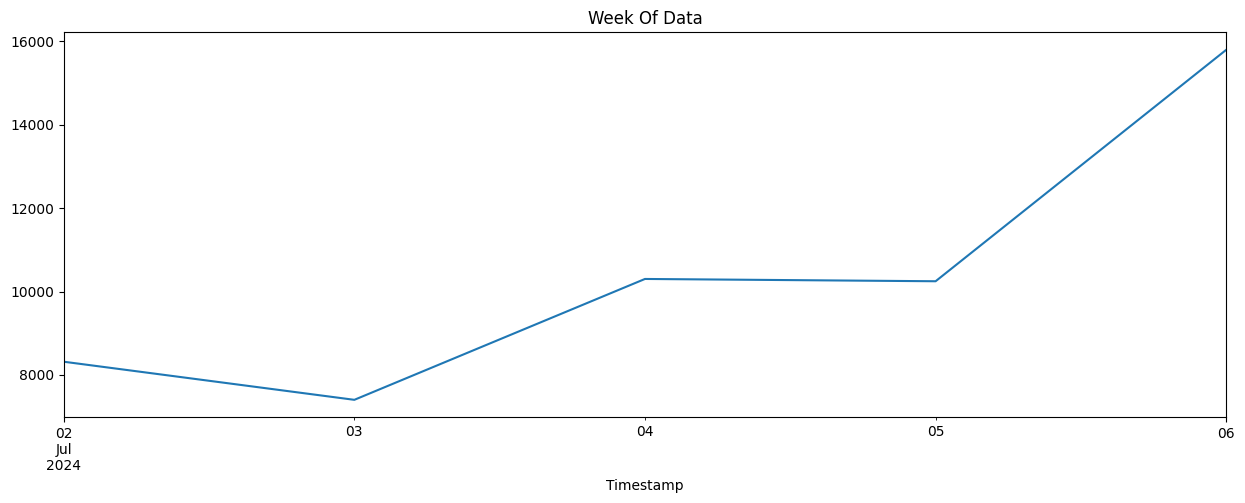

In [16]:
df['Sales Count'].loc[(df.index > '2024-07-01') & (df.index < '2024-07-07')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

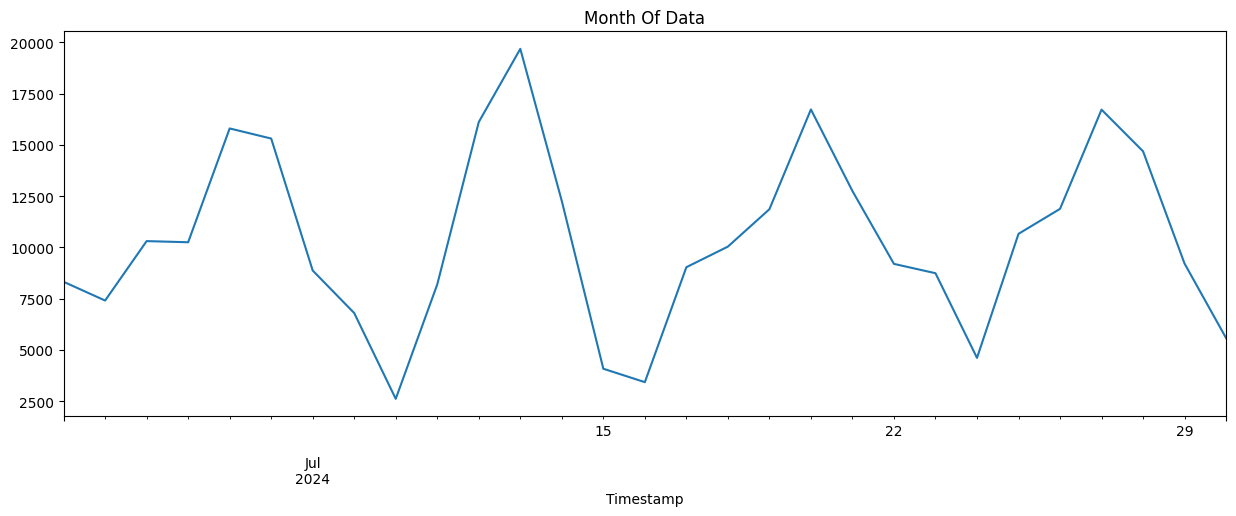

In [18]:
df['Sales Count'].loc[(df.index > '2024-07-01') & (df.index < '2024-07-31')] \
    .plot(figsize=(15, 5), title='Month Of Data')
plt.show()

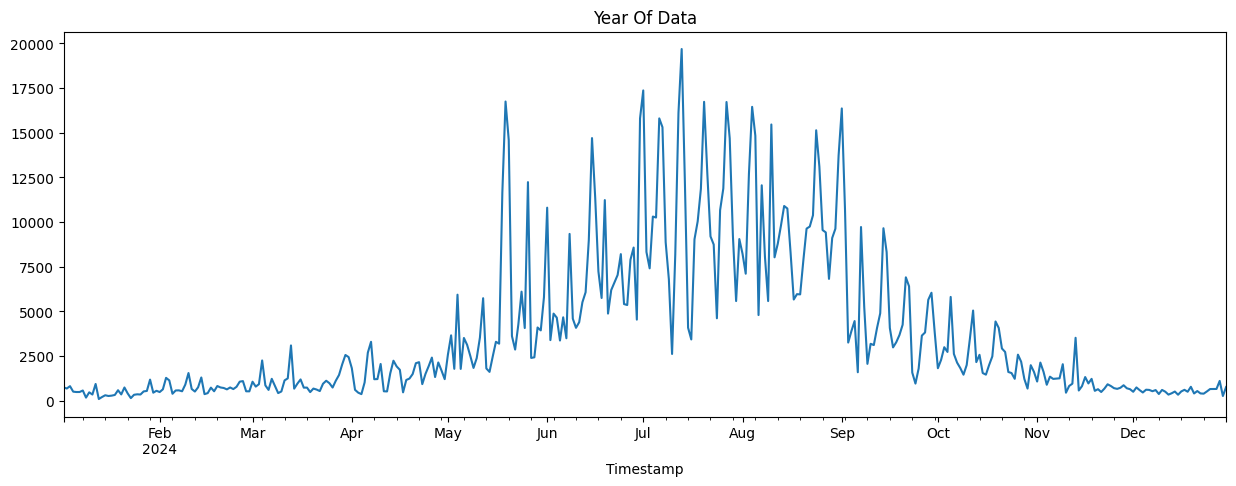

In [7]:
df['Sales Count'].loc[(df.index > '2024-01-01') & (df.index < '2024-12-31')] \
    .plot(figsize=(15, 5), title='Year Of Data')
plt.show()

## covid time

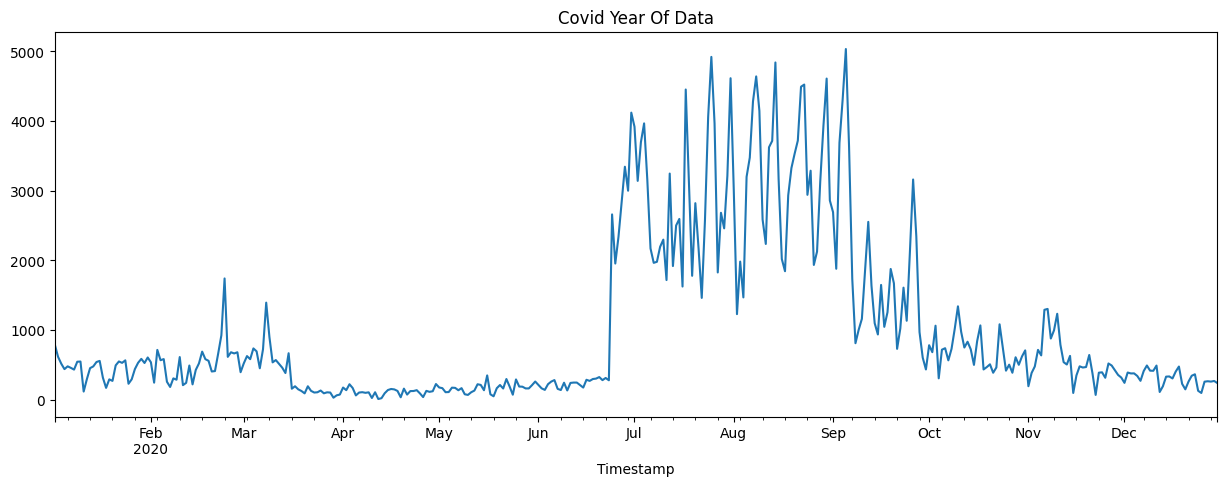

In [9]:
df['Sales Count'].loc[(df.index > '2020-01-01') & (df.index < '2020-12-31')] \
    .plot(figsize=(15, 5), title='Covid Year Of Data')
plt.show()

## detect outliers

In [10]:


def detect_outliers(series, period=365, threshold=3):
    """
    Detect outliers using seasonal decomposition residuals where period is annual - 365 and threshold is SD for outlier.
    returns true/false mask aand res
    """
    # Decompose the series
    res = seasonal_decompose(series, period=period, extrapolate_trend='freq', model='additive')
    resid = res.resid.dropna()
    # Outlier detection threshold
    std = resid.std()
    outlier_mask = resid.abs() > (threshold * std)
    outlier_residuals = resid[outlier_mask]
    return outlier_mask, outlier_residuals


In [11]:
outlier_mask, outlier_residuals = detect_outliers(df['Sales Count'])
print("Number of outliers detected:", outlier_mask.sum())
print("Outlier dates:\n", outlier_residuals.index)

Number of outliers detected: 86
Outlier dates:
 DatetimeIndex(['2015-07-18', '2015-07-26', '2015-08-02', '2015-08-09',
               '2015-08-16', '2015-08-22', '2015-08-23', '2015-09-06',
               '2015-09-07', '2016-05-22', '2016-05-23', '2016-06-04',
               '2016-06-18', '2016-06-19', '2016-06-25', '2016-07-16',
               '2016-07-17', '2016-07-23', '2016-08-01', '2016-08-27',
               '2016-09-04', '2016-09-05', '2017-06-30', '2017-07-02',
               '2017-07-03', '2017-07-04', '2017-07-10', '2017-07-15',
               '2017-07-17', '2017-07-23', '2017-07-24', '2017-07-29',
               '2017-08-13', '2017-09-16', '2017-09-23', '2017-09-24',
               '2018-05-20', '2018-06-09', '2018-06-16', '2018-06-17',
               '2018-06-30', '2018-07-01', '2018-07-07', '2018-07-08',
               '2018-07-14', '2018-07-15', '2018-07-21', '2018-07-28',
               '2018-07-29', '2018-08-04', '2018-08-05', '2018-08-11',
               '2018-08-18', 

## less outliers compared to redemption data

In [17]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3690 entries, 2015-05-01 to 2025-06-06
Freq: D
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   _id               3690 non-null   int32
 1   Redemption Count  3690 non-null   int32
 2   Sales Count       3690 non-null   int32
 3   monthly           3690 non-null   int64
 4   quarter           3690 non-null   int64
 5   year              3690 non-null   int64
 6   dayofweek         3690 non-null   int64
 7   dayofyear         3690 non-null   int64
 8   dayofmonth        3690 non-null   int64
 9   weekofyear        3690 non-null   int32
dtypes: int32(4), int64(6)
memory usage: 259.5 KB


## Outliers mask

In [18]:
 df[outlier_mask]['Sales Count'].describe()

count       86.000000
mean     15240.441860
std       7173.852991
min        280.000000
25%      13155.500000
50%      17422.000000
75%      19717.000000
max      25585.000000
Name: Sales Count, dtype: float64

In [30]:
 df[outlier_mask]['Sales Count'].index.year.unique(0)

Int64Index([2015, 2016, 2017, 2018, 2019, 2022, 2023, 2024], dtype='int64', name='Timestamp')

In [19]:
df['Sales Count'].describe()

count     3690.000000
mean      3176.848509
std       4338.948797
min          0.000000
25%        470.250000
50%       1064.000000
75%       3965.500000
max      25585.000000
Name: Sales Count, dtype: float64

## replace outliers 

In [20]:
df['Sales Count'] = np.where(outlier_mask, np.nan, df['Sales Count'])
df['Sales Count'] = df['Sales Count'].interpolate()  # linear fill


# Train

val shape (2960, 11) (365, 11)
15316804.043928972
Base 0.858460395471306


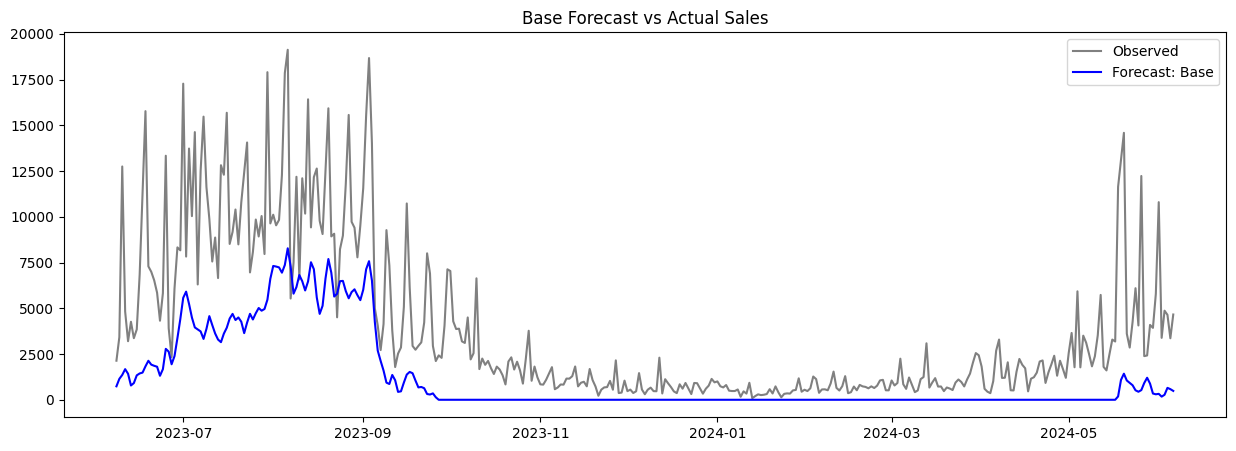

29596670.999051932
ARIMA 0.7336802760671528


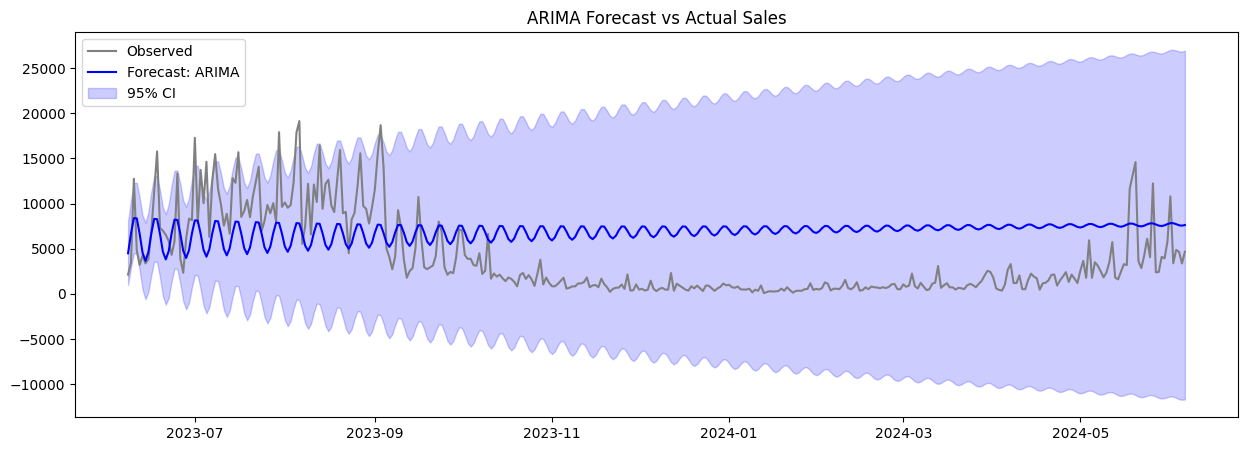

8731903.731946133
ETS 0.5629275999595107


G:\Users\Fahim\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


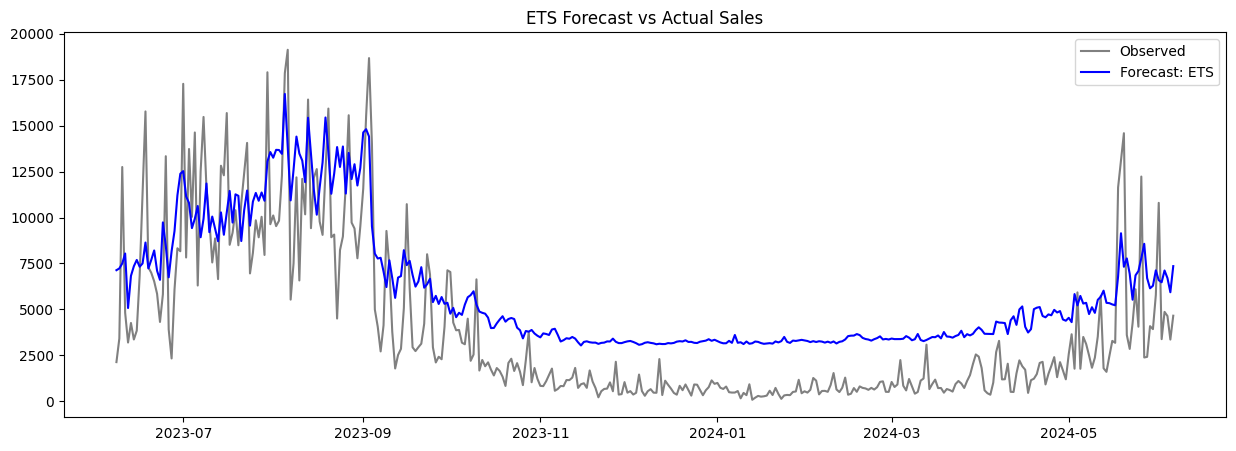

22:56:47 - cmdstanpy - INFO - Chain [1] start processing
22:56:47 - cmdstanpy - INFO - Chain [1] done processing


7960319.612862979
Prophet Season Holiday 1.146665821564371


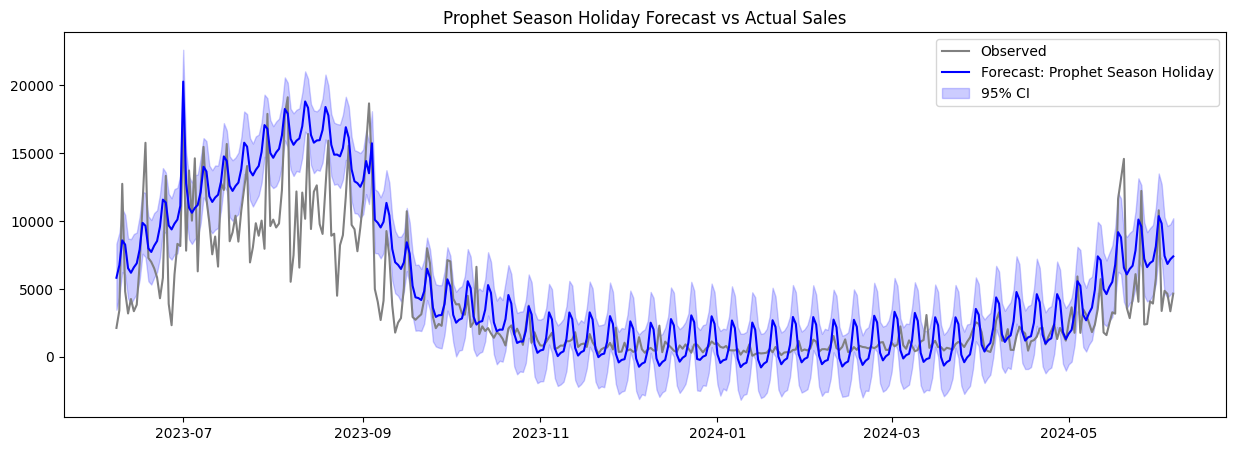

Index(['Redemption_lag7', 'Redemption_lag1', 'dayofweek', 'dayofyear',
       'monthly', 'season', 'weekofyear', 'seasonal_base', 'lag7', 'lag28'],
      dtype='object')


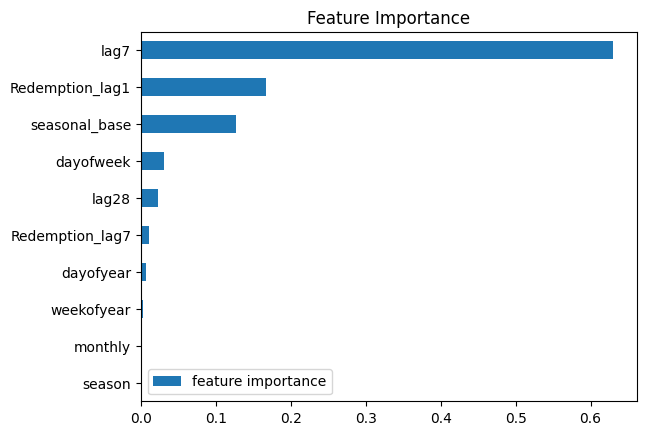

3224749.5379993515
RF 0.38097884966701007


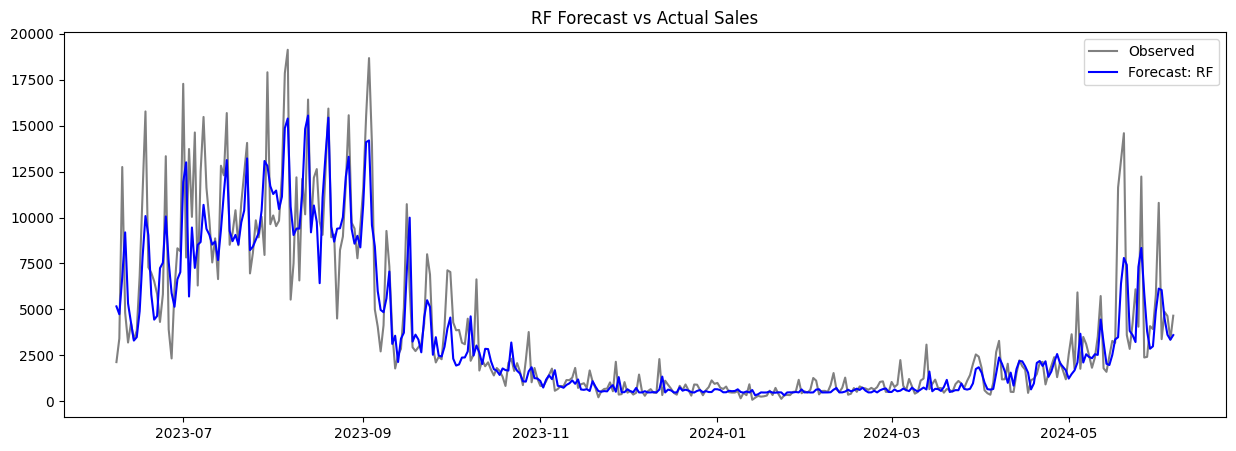

Index(['Redemption_lag1', 'Redemption_lag7', 'dayofweek', 'dayofyear',
       'monthly', 'season', 'weekofyear', 'seasonal_base', 'lag7', 'lag14',
       'lag28', 'lag30', 'lag56', 'lag_year'],
      dtype='object')


G:\Users\Fahim\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:56:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


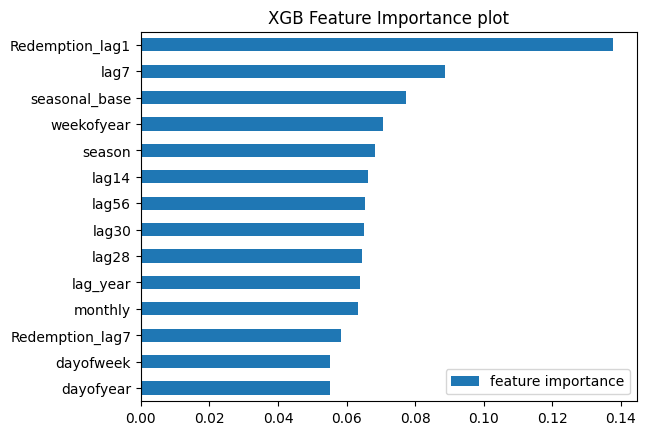

3122378.638033138
XGB 0.4099910741066279


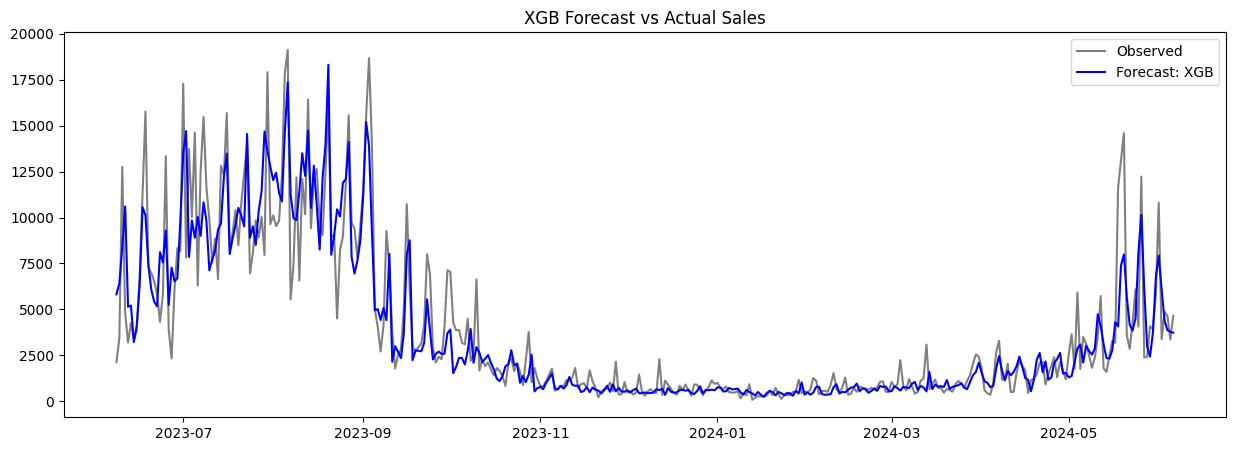

Index(['Redemption_lag7', 'Redemption_lag1', 'dayofweek', 'dayofyear',
       'monthly', 'season', 'weekofyear', 'seasonal_base', 'lag3', 'lag7',
       'lag28'],
      dtype='object')
3449088.1978847785
LGBM 0.38800243663880113


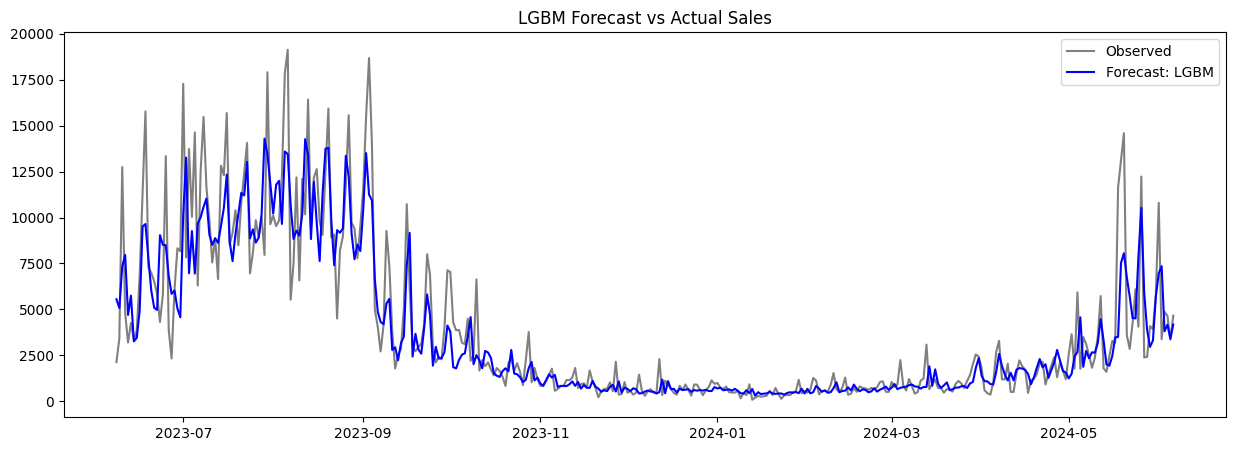

Index(['Redemption_lag1', 'Redemption_lag7', 'dayofweek', 'dayofyear',
       'monthly', 'season', 'weekofyear', 'seasonal_base', 'lag7', 'lag14',
       'lag28', 'lag30', 'lag56'],
      dtype='object')


G:\Users\Fahim\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:56:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


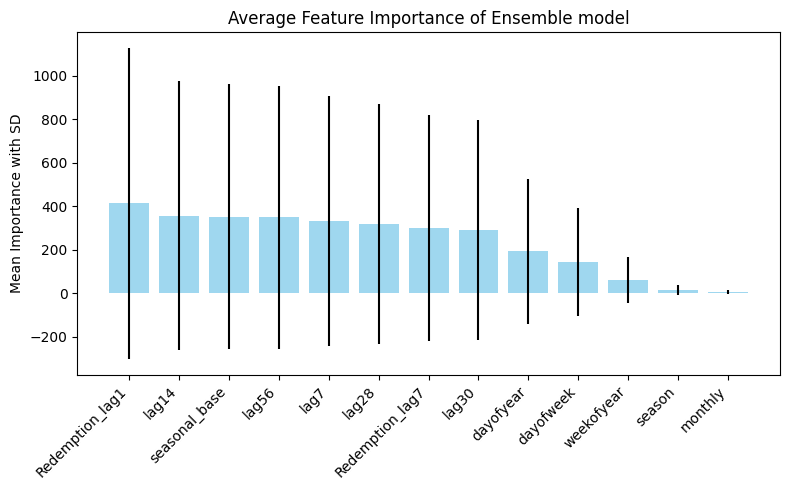

(365,) (2904,)
2935918.666783337
Ensemble model 0.3781837380774072


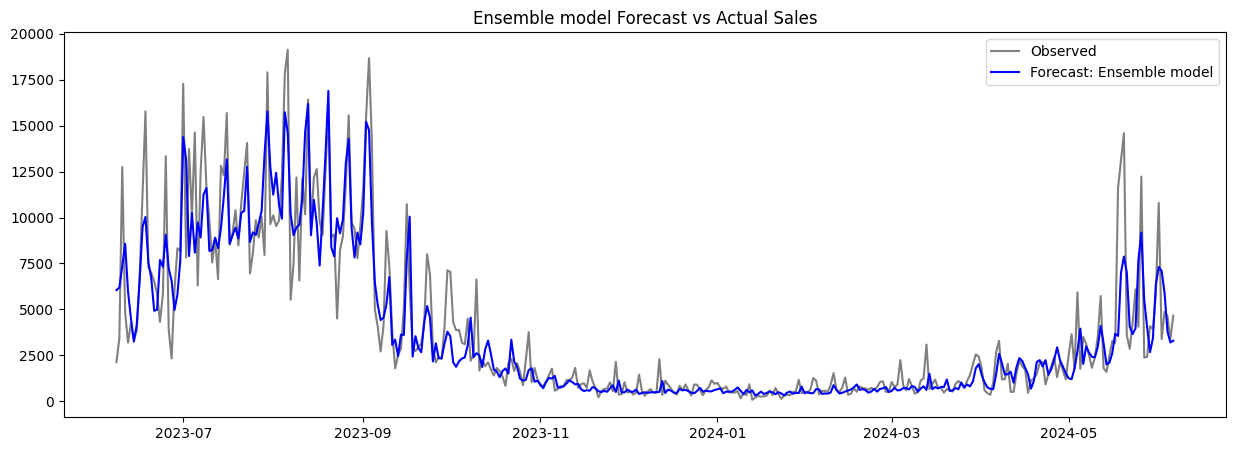

val shape (3325, 11) (365, 11)
12877141.550399315
Base 0.8429367566753176


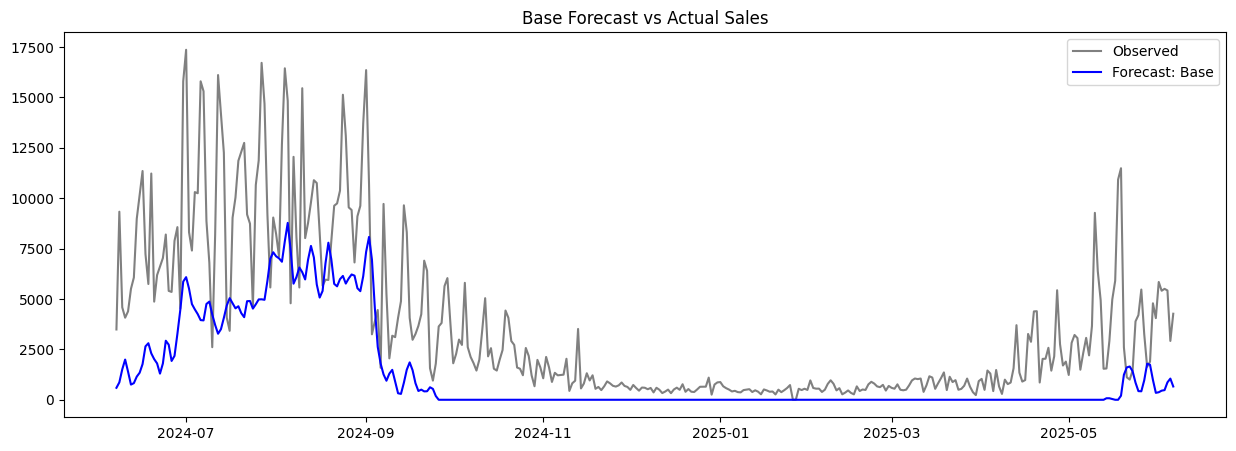

14524461.824538574
ARIMA 0.9193792051094863


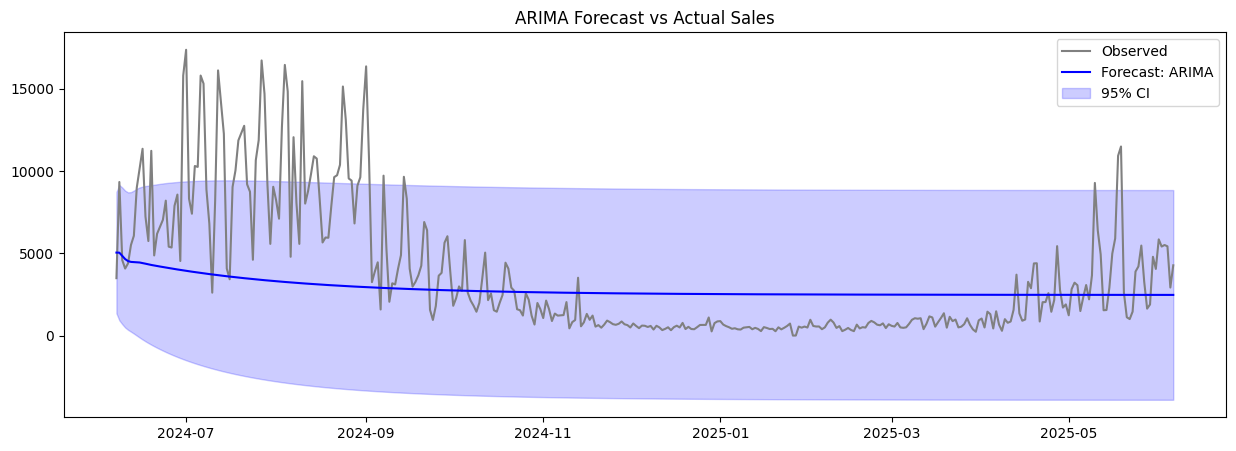

6369724.205980203
ETS 0.5201162103189965


G:\Users\Fahim\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


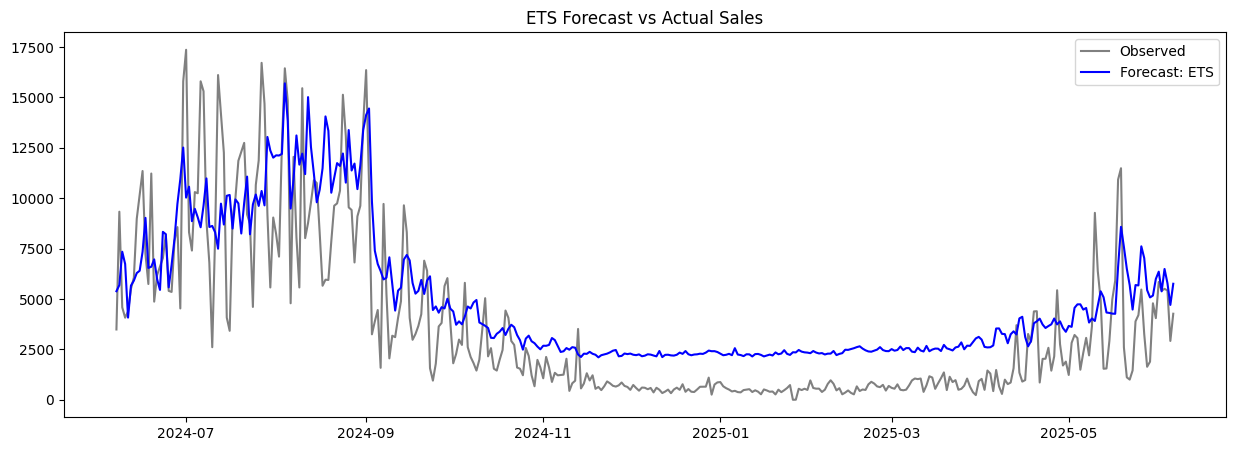

22:57:02 - cmdstanpy - INFO - Chain [1] start processing
22:57:02 - cmdstanpy - INFO - Chain [1] done processing


4745620.823487782
Prophet Season Holiday 1.0163379634672196


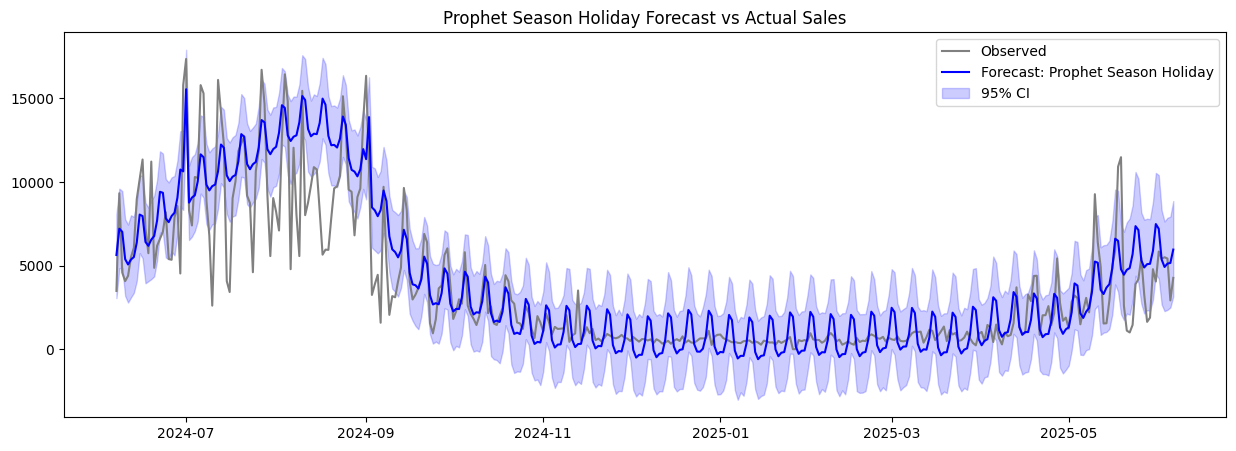

Index(['Redemption_lag7', 'Redemption_lag1', 'dayofweek', 'dayofyear',
       'monthly', 'season', 'weekofyear', 'seasonal_base', 'lag7', 'lag28'],
      dtype='object')


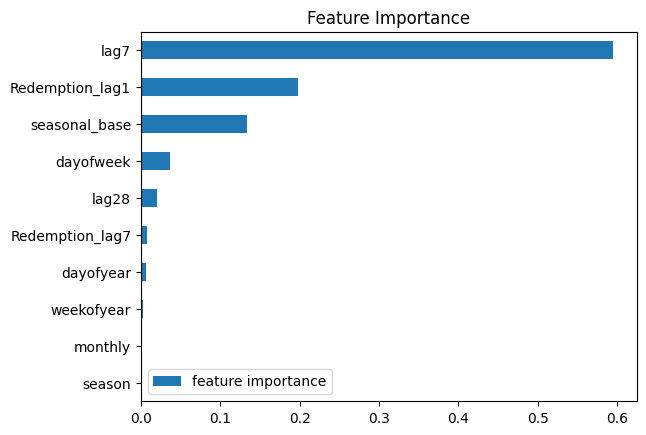

3513840.60532163
RF 0.5703660531501197


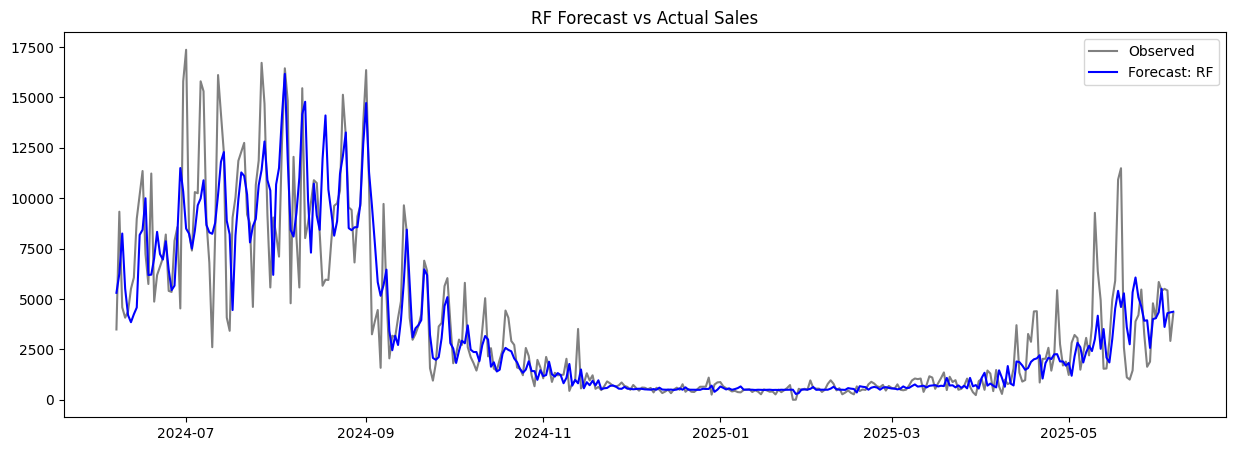

Index(['Redemption_lag1', 'Redemption_lag7', 'dayofweek', 'dayofyear',
       'monthly', 'season', 'weekofyear', 'seasonal_base', 'lag7', 'lag14',
       'lag28', 'lag30', 'lag56', 'lag_year'],
      dtype='object')


G:\Users\Fahim\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:57:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


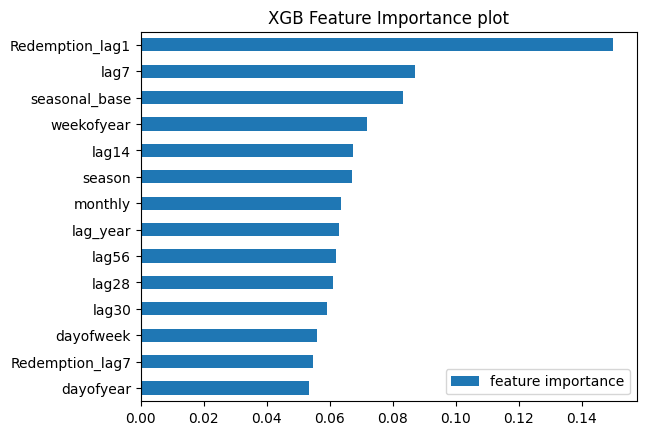

3498484.153886505
XGB 0.38227702001658914


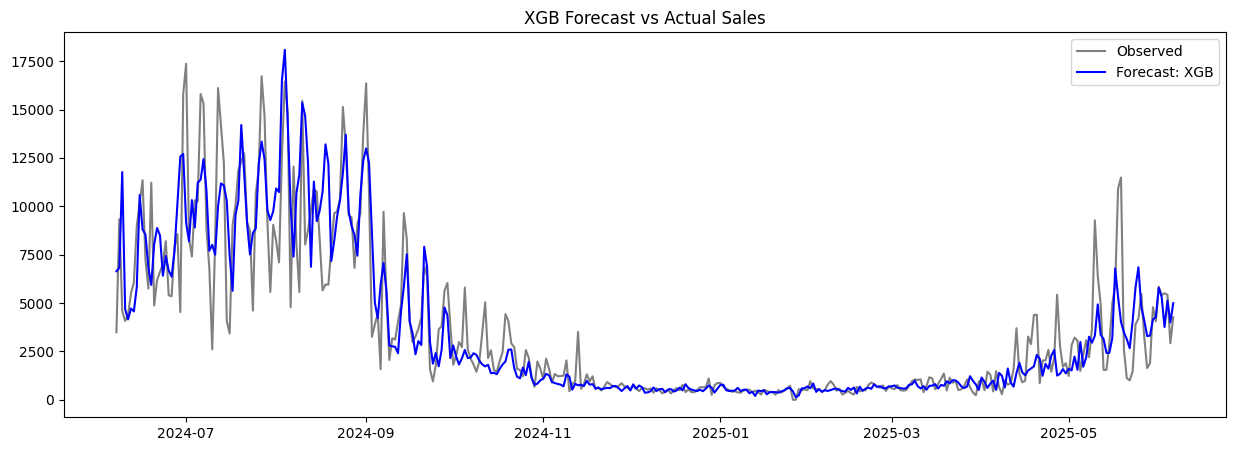

Index(['Redemption_lag7', 'Redemption_lag1', 'dayofweek', 'dayofyear',
       'monthly', 'season', 'weekofyear', 'seasonal_base', 'lag3', 'lag7',
       'lag28'],
      dtype='object')
3104060.000051464
LGBM 0.5304764884420687


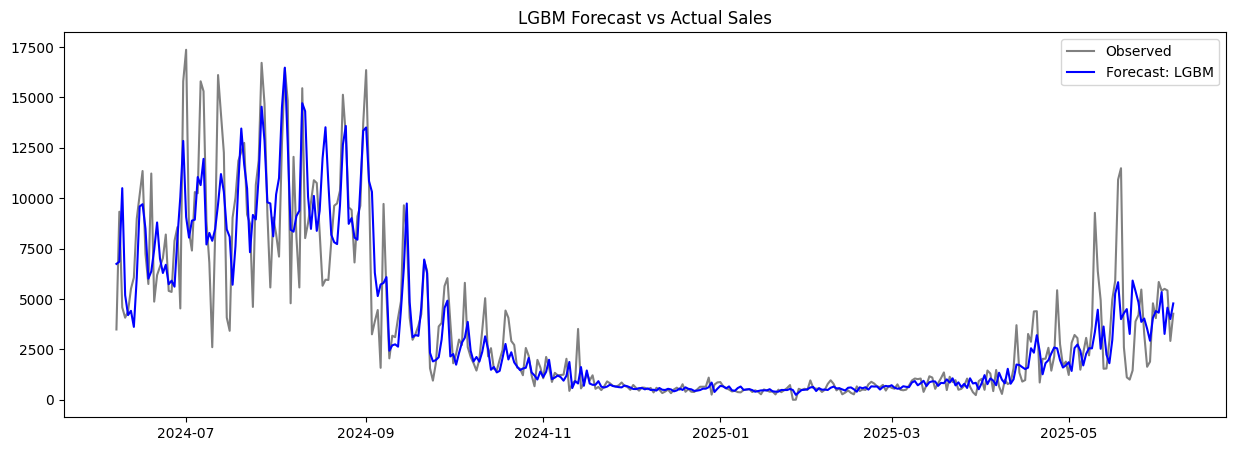

Index(['Redemption_lag1', 'Redemption_lag7', 'dayofweek', 'dayofyear',
       'monthly', 'season', 'weekofyear', 'seasonal_base', 'lag7', 'lag14',
       'lag28', 'lag30', 'lag56'],
      dtype='object')


G:\Users\Fahim\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [22:57:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


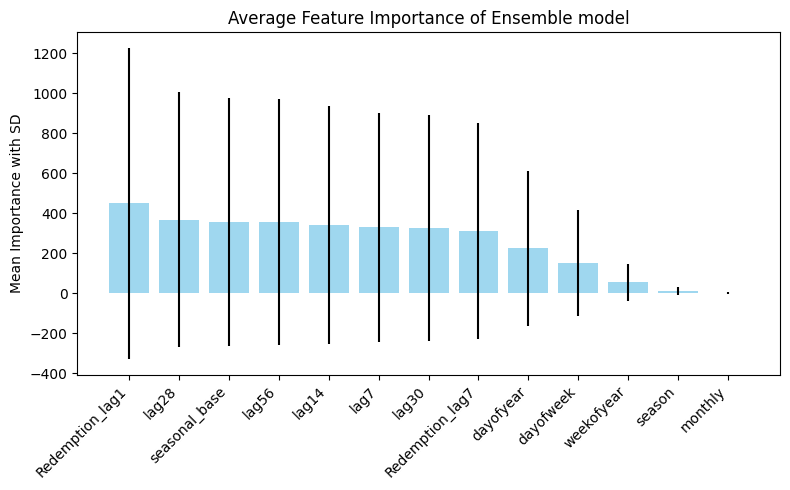

(365,) (3269,)
3416069.946714848
Ensemble model 0.5063262009151391


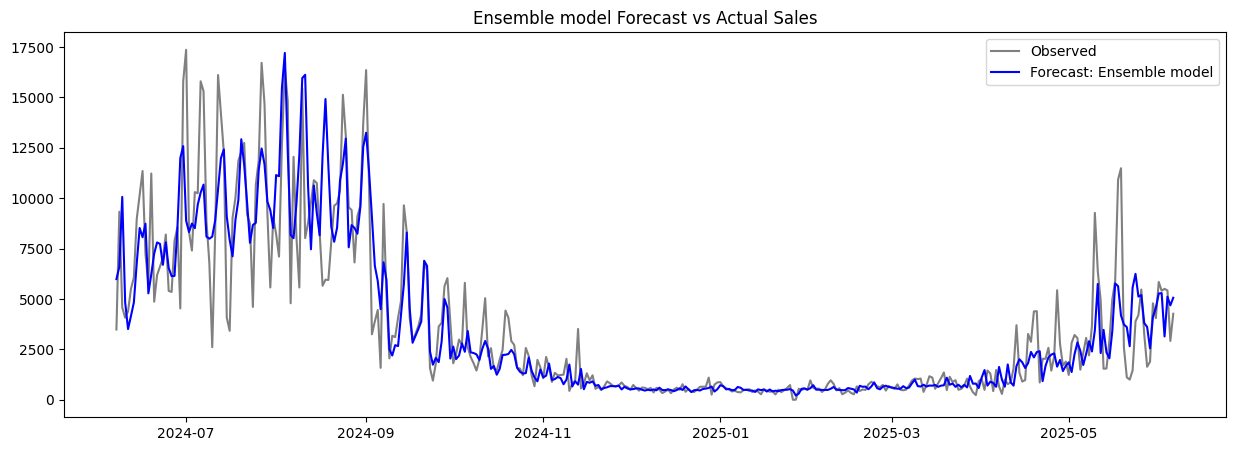

In [21]:
smd = SalesModel(df, 'Sales Count')
smd.run_models()

## feature importance

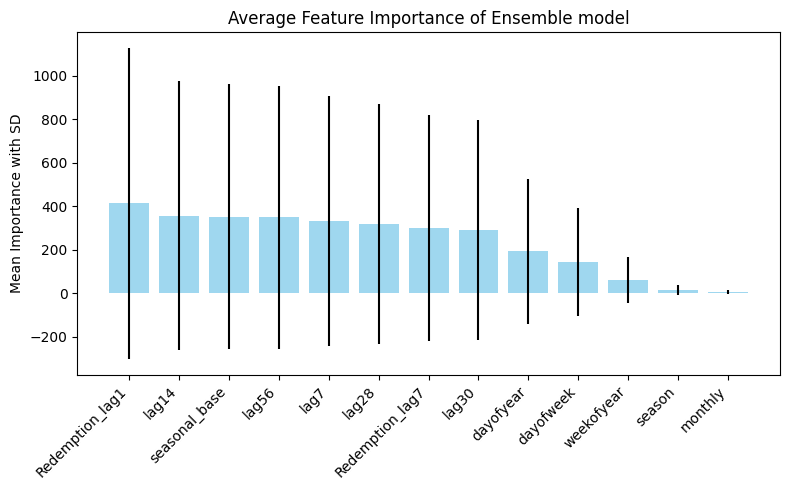


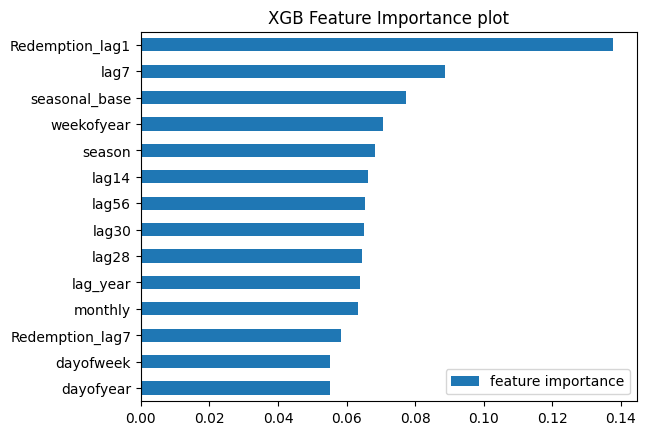

## best model params after grid search

#XGB<br>
best params {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 600, 'reg_alpha': 0.4, 'reg_lambda': 6, 'subsample': 0.8}<br>
#Fitting 5 folds for each of 240 candidates, totalling 1200 fits<br>
RF {'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 500}<br>
LGBM<br>
Fitting 2 folds for each of 486 candidates, totalling 972 fits<br>
{'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 7, 'n_estimators': 700, 'num_leaves': 31, 'reg_alpha': 0}


## score 


In [22]:
# print model summary stats
smd.results

{'Base': {0: 0.858460395471306, 1: 0.8429367566753176},
 'ARIMA': {0: 5.659065413716061, 1: 3.4815383594640794},
 'ETS': {0: 2.574440609325436, 1: 3.397213702049271},
 'Prophet Season Holiday': {0: 1.146665821564371, 1: 1.0163379634672196},
 'RF': {0: 0.38097884966701007, 1: 0.5703660531501197},
 'XGB': {0: 0.3809463720573076, 1: 0.4651290416630283},
 'LGBM': {0: 0.38800243663880113, 1: 0.5304764884420687},
 'Ensemble model': {0: 0.3781837380774072, 1: 0.5063262009151391}}

## average score by model

In [24]:
smd_means = {key: sum(values.values()) / len(values) for key, values in smd.results.items()}
print(smd_means)

{'Base': 0.8506985760733119, 'ARIMA': 4.57030188659007, 'ETS': 2.9858271556873532, 'Prophet Season Holiday': 1.0815018925157953, 'RF': 0.47567245140856484, 'XGB': 0.42303770686016795, 'LGBM': 0.4592394625404349, 'Ensemble model': 0.4422549694962732}


In [25]:

for key,value in smd_means.items():
    print("Sales Model : ",key," - Score :", round(value,3))

Sales Model :  Base  - Score : 0.851
Sales Model :  ARIMA  - Score : 4.57
Sales Model :  ETS  - Score : 2.986
Sales Model :  Prophet Season Holiday  - Score : 1.082
Sales Model :  RF  - Score : 0.476
Sales Model :  XGB  - Score : 0.423
Sales Model :  LGBM  - Score : 0.459
Sales Model :  Ensemble model  - Score : 0.442


# performance improvement by model

In [26]:
for key,value in smd_means.items():
    if key=="Base":
        continue
    else:
        print("performance imporvement than base Sales model for ",key," model is ",round(((smd_means['Base']-value)/smd_means['Base']*100),2),"%")

performance imporvement than base Sales model for  ARIMA  model is  -437.24 %
performance imporvement than base Sales model for  ETS  model is  -250.99 %
performance imporvement than base Sales model for  Prophet Season Holiday  model is  -27.13 %
performance imporvement than base Sales model for  RF  model is  44.08 %
performance imporvement than base Sales model for  XGB  model is  50.27 %
performance imporvement than base Sales model for  LGBM  model is  46.02 %
performance imporvement than base Sales model for  Ensemble model  model is  48.01 %


In [27]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025],
      dtype=int64)

 ## Use error to tune models